In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [2]:
img = cv2.imread('Curve3.jpg', 1) #(window name, color specification)
print(img.shape)

(540, 960, 3)


In [26]:
#displaying image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(blur, 170, 250)
cv2.imshow('Geay', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
#drawing shapes on image
img1 = cv2.line(img, (30,80), (100,255), (0,255,255),2) #(img,start cordinates,endcordinate,color of line,thickness of line)
img1 = cv2.arrowedLine(img, (255,80), (30,20), (0,0,255),2)
font = cv2.FONT_HERSHEY_SIMPLEX
img1 = cv2.putText(img,"Hello", (85,150), font, 1, (12,123,144), 5, cv2.LINE_AA) #(img,text,start point, font,font size,color,thickenss,line type)
cv2.imshow("imgWithLine",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
#capture video from camera
cap = cv2.VideoCapture(0)  # 0 selects the default camera, if 0 doesnt work try -1. or if you need to read a file give file name
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #can also write 3 insted of cv2.CAP_PROP_FRAME_WIDTH -> predefined
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(3, 1280) #set frame height and width
cap.set(4, 740)

print(cap.get(3)," ",cap.get(4))

while(cap.isOpened()):   #returns true if path is correct
    ret, frame = cap.read() #read evey frame from camera in loop. ret has true if tere is a farme... and frame has the actual frame
    cv2.imshow('Camera',frame)
    
    #grey scale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Gray Scale', gray)
    
    if cv2.waitKey(1) & 0xFF == ord('e'): #0xFF for 64 bit machines and ord('e') get value of e key
        break

cap.release()
cv2.destroyAllWindows()


640.0
480.0
960.0   540.0


In [9]:
#click event with circle
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 3,(0,0,255),-1) #-1 thickeness fills the shape with the specified color
        points.append((x, y))
        if len(points) >= 2:
            cv2.line(img, points[-2], points[-1], (255,0,0), 2)
        cv2.imshow('image', img)
        
img = cv2.imread('street.jpeg', 1)
cv2.imshow('image', img)
points=[]
cv2.setMouseCallback('image',click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
#edge detection
img1 = cv2.imread('sudoku.png', 0)
lap = cv2.Laplacian(img1, cv2.CV_64F, ksize=1)
lap = np.uint8(np.absolute(lap))
cv2.imshow('Laplacian Edge', lap)

sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize=1) #img, datatype(64bit float to deal with -ve numbers, derivative of x, derivative of y, kernel value
sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize=1)
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))
cv2.imshow('sobelx', sobelx)
cv2.imshow('sobely', sobely)

sobelCombined = cv2.bitwise_or(sobelx, sobely)
cv2.imshow('sobelCombined', sobelCombined)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#canny edge detection
img2 = cv2.imread('road.jpg', 0)
def nothing(x):
    pass

cv2.namedWindow('cannyw')
cv2.createTrackbar('lower', 'cannyw', 100, 1000, nothing)
cv2.createTrackbar('upper', 'cannyw', 200, 1000, nothing)
while(1):
    lo = cv2.getTrackbarPos('lower', 'cannyw')
    up = cv2.getTrackbarPos('upper', 'cannyw')
    canny = cv2.Canny(img2, lo, up)
    cv2.imshow('cannyw', canny)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2576: error: (-27:Null pointer) NULL window: 'cannyw' in function 'cvGetTrackbarPos'


540 960


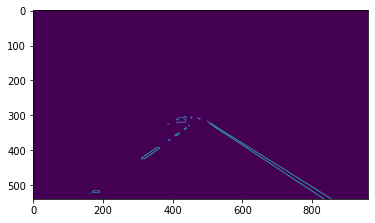

In [7]:
#lower = 330, upper 390
def roi(img, vertices):
    mask = np.zeros_like(img)
#     channel = img.shape[2]
    match_mask = 255
    cv2.fillPoly(mask, vertices, match_mask)
    masked = cv2.bitwise_and(img, mask)
    return masked

img = cv2.imread('road.jpg')

height = img.shape[0]
width = img.shape[1]
print(height, width)
roi_vertices = [(0,height), (width/2, height/2),(width,height)]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(gray, 330, 390)
cropped = roi(canny, np.array([roi_vertices], np.int32),)
plt.imshow(cropped)
plt.show()   

In [6]:
img = cv2.imread('Curve.jpeg')

height = img.shape[0]
width = img.shape[1]
roi_vertices = [(0,height), (width/4, height/2), (width*3/4, height/2),(width,height)]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(gray, 450, 500)
cropped = roi(canny, np.array([roi_vertices], np.int32),)
plt.imshow(cropped)
plt.show()

ret, thresh = cv2.threshold(cropped, 127,255,0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))
cv2.drawContours(img, contours, -1, (0,255,0),3)

plt.imshow(img)
plt.show()


NameError: name 'roi' is not defined

In [13]:
import cv2
import numpy as np
def roi(img, vertices):
    mask = np.zeros_like(img)
#     channel = img.shape[2]
    match_mask = 255
    cv2.fillPoly(mask, vertices, match_mask)
    masked = cv2.bitwise_and(img, mask)
    return masked

def lanedetect(img):
    height = img.shape[0]
    width = img.shape[1]
    roi_vertices = [(0,height), (width/4, height/2), (width*3/4, height/2),(width,height)]

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 170, 250)
    cropped = roi(canny, np.array([roi_vertices], np.int32),)
#     plt.imshow(cropped)
#     plt.show()
    cv2.imshow('cropped', cropped)

#     ret, thresh = cv2.threshold(cropped, 127,255,0)
    contours, hierarchy = cv2.findContours(cropped, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     print(len(contours))
    
    image_with_lines = cv2.drawContours(img, contours, -1, (255,0,0),3)
    
    return image_with_lines

cap = cv2.VideoCapture('roadlane.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = lanedetect(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('e'):
        cap.release()
        break



In [3]:
import cv2
import numpy as np
def roi(img, vertices):
    mask = np.zeros_like(img)
#     channel = img.shape[2]
    match_mask = 255
    cv2.fillPoly(mask, vertices, match_mask)
    masked = cv2.bitwise_and(img, mask)
    return masked

def lanedetect(img):
    height = img.shape[0]
    width = img.shape[1]
    roi_vertices = [(0,height), (width/4, height/2), (width*3/4, height/2),(width,height)]

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 170, 250)
    cropped = roi(canny, np.array([roi_vertices], np.int32),)
#     plt.imshow(cropped)
#     plt.show()
#     cv2.imshow('cropped', cropped)
#     ret, thresh = cv2.threshold(cropped, 127,255,0)
    contours, hierarchy = cv2.findContours(cropped, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     image_with_lines = cv2.drawContours(img, contours, 0, (255,255,0),3)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    img2 = cropped
    pts=[]
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.3* cv2.arcLength(cnt, True), True)
        
        print(approx.shape)
        print(approx)
        print(approx[0][0][0])
        print(approx[0][0][1])
        
        if approx.shape[0]==1:
            approx[0][0][0] = 0
            approx[0][0][1] = 0
            continue
        
 
        avg = (approx[0][0][1] + approx[1][0][1])/2
        border = (approx[0][0][1]*0.05) + approx[0][0][1]
        
        if avg < border:
            approx[0][0][0] = 0
            approx[0][0][1] = 0
            approx[1][0][0] = 0
            approx[1][0][1] = 0
        
#         if (approx[0][0][0] != 0 and approx[0][0][1] != 0) :
            

        cv2.drawContours(img, [approx], 0, (255,255,0),5)
  
    cv2.imshow('img2', img2)
    
    return img

image = cv2.imread("Curve3.jpg", 1)
frame = lanedetect(image)
cv2.imshow("img", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cap = cv2.VideoCapture('roadlane.mp4')

# while(cap.isOpened()):
#     ret, frame = cap.read()
#     frame = lanedetect(frame)
#     cv2.imshow('frame', frame)
#     if cv2.waitKey(1) & 0xFF == ord('e'):
#         cap.release()
#         break


(2, 1, 2)
[[[353 410]]

 [[280 462]]]
353
410
(2, 1, 2)
[[[353 411]]

 [[281 461]]]
353
411
(2, 1, 2)
[[[160 386]]

 [[130 393]]]
160
386
(2, 1, 2)
[[[160 383]]

 [[135 388]]]
160
383
(2, 1, 2)
[[[420 356]]

 [[406 366]]]
420
356
(2, 1, 2)
[[[420 357]]

 [[406 365]]]
420
357
(2, 1, 2)
[[[305 349]]

 [[277 355]]]
305
349
(2, 1, 2)
[[[194 348]]

 [[174 349]]]
194
348
(2, 1, 2)
[[[196 346]]

 [[203 352]]]
196
346
(2, 1, 2)
[[[221 347]]

 [[207 350]]]
221
347
(2, 1, 2)
[[[211 341]]

 [[230 341]]]
211
341
(2, 1, 2)
[[[442 339]]

 [[436 344]]]
442
339
(2, 1, 2)
[[[441 339]]

 [[437 344]]]
441
339
(2, 1, 2)
[[[450 331]]

 [[452 335]]]
450
331
(2, 1, 2)
[[[451 331]]

 [[450 335]]]
451
331
(2, 1, 2)
[[[215 328]]

 [[228 325]]]
215
328
(2, 1, 2)
[[[248 331]]

 [[197 332]]]
248
331
(1, 1, 2)
[[[288 321]]]
288
321
(2, 1, 2)
[[[216 318]]

 [[221 321]]]
216
318
(2, 1, 2)
[[[509 320]]

 [[898 538]]]
509
320
(2, 1, 2)
[[[506 318]]

 [[877 538]]]
506
318
(1, 1, 2)
[[[220 315]]]
220
315
(2, 1, 2)
[[[480

In [2]:
import cv2
img = cv2.imread('Curve3.jpg',1)
cv2.imshow('processed', img)

In [24]:
import cv2
import numpy as np

# Define source and destination points
# src = np.float32([[200, 720], [1100, 720], [595, 450], [685, 450]])
# dst = np.float32([[500, 720], [980, 720], [300, 0], [980, 0]])


# Load image
img = cv2.imread('Curve3.jpg')

height = img.shape[0]
width = img.shape[1]
print(width,height)
src=np.float32([[240, 270], [720, 270],[0, 540],[960, 540]])
dst=np.float32([[0,0], [width,0],[0,height],[width,height]])
print(src)
dst_size=(width,height)
# Calculate perspective transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply perspective transformation
warped = cv2.warpPerspective(img, M, dst_size)

# Show original and transformed images
cv2.imshow('Original Image', img)
cv2.imshow('Warped Image', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()


960 540
[[240. 270.]
 [720. 270.]
 [  0. 540.]
 [960. 540.]]
